# Financial Services Use In Tanzania


In [21]:
# loading modules
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [22]:
# reading csv
mob_mon= pd.read_csv('resources/training.csv')
mob_mon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7094 entries, 0 to 7093
Data columns (total 37 columns):
ID                             7094 non-null int64
Q1                             7094 non-null int64
Q2                             7094 non-null int64
Q3                             7094 non-null int64
Q4                             7094 non-null int64
Q5                             7094 non-null int64
Q6                             7094 non-null int64
Q7                             7094 non-null int64
Q8_1                           7094 non-null int64
Q8_2                           7094 non-null int64
Q8_3                           7094 non-null int64
Q8_4                           7094 non-null int64
Q8_5                           7094 non-null int64
Q8_6                           7094 non-null int64
Q8_7                           7094 non-null int64
Q8_8                           7094 non-null int64
Q8_9                           7094 non-null int64
Q8_10                     

In [23]:
#missing values
missing_values = mob_mon.isnull().sum().sum()
print('Number of missing values:',missing_values) 


Number of missing values: 0


In [24]:
summary = mob_mon.describe()
summary = summary.transpose()
summary.head()

,count,mean,std,min,25%,50%,75%,max
ID,7094.0,4742.627291,2731.120086,1.0,2397.25,4744.5,7105.0,9459.0
Q1,7094.0,38.239498,16.332148,16.0,25.00,35.0,48.0,100.0
Q2,7094.0,1.559910,0.496433,1.0,1.00,2.0,2.0,2.0
Q3,7094.0,1.787426,1.165160,1.0,1.00,1.0,3.0,4.0
Q4,7094.0,3.060051,1.557779,1.0,2.00,3.0,3.0,8.0


In [25]:
males = mob_mon[mob_mon.Q2 == 1]

In [26]:
females = mob_mon[mob_mon.Q2 == 2]

In [27]:
f1 = len(females[females.mobile_money == 1])
f2 = len(females[females.mobile_money == 0])
f = f1 + f2
print('Females with Mobile Money:',f1)
print('Females without Mobile Money:',f2)
print('Total number of females:',f)

Females with Mobile Money: 1971
Females without Mobile Money: 2001
Total number of females: 3972


In [28]:
m1 = len(males[males.mobile_money == 1])
m2 = len(males[males.mobile_money == 0]) 
m = m1 + m2
print('Males with Mobile Money:',m1)
print('Males without Mobile Money:',m2)
print('Total number of males:',m)

Males with Mobile Money: 1959
Males without Mobile Money: 1163
Total number of males: 3122


In [29]:
average_male_age = males[males.mobile_money == 1].Q1.mean()
print(average_male_age)

37.12404287901991


In [30]:
average_female_age = females[females.mobile_money == 1].Q1.mean()
print( average_female_age)

35.531709791983765


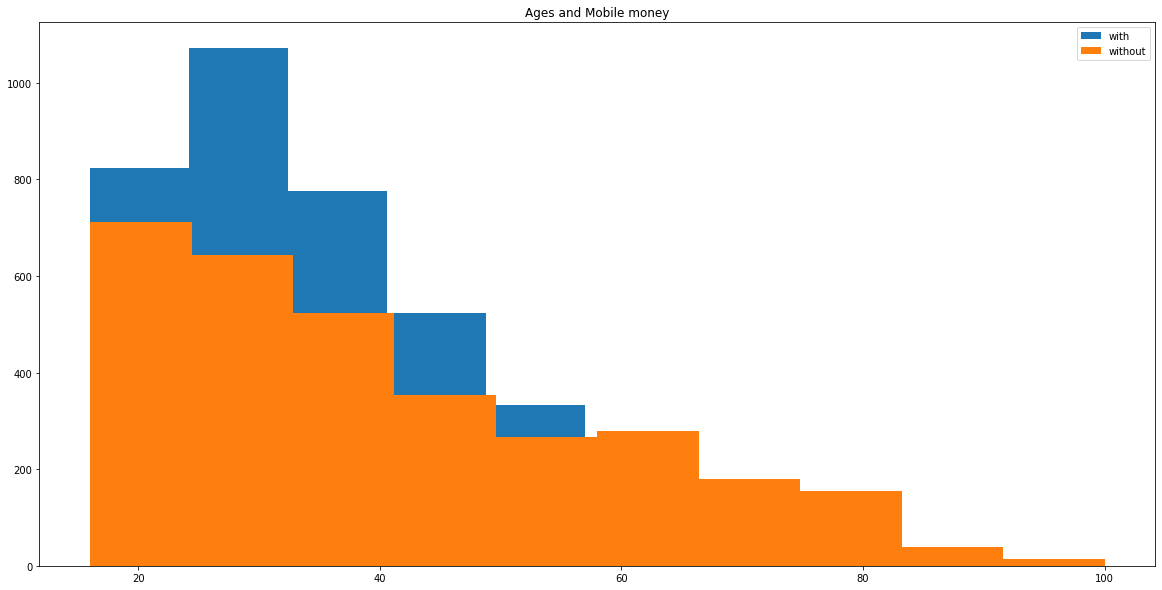

In [31]:
#age
without_mob_mon = mob_mon[mob_mon.mobile_money == 0]
with_mob_mon = mob_mon[mob_mon.mobile_money == 1]

# Line plot to show the relationship between age and mobile money.
plt.figure(figsize=(20,10))
plt.hist(with_mob_mon.Q1,label='with')
plt.hist(without_mob_mon.Q1,label='without')
plt.title('Ages and Mobile money')
plt.legend(loc='upper right')
plt.show()

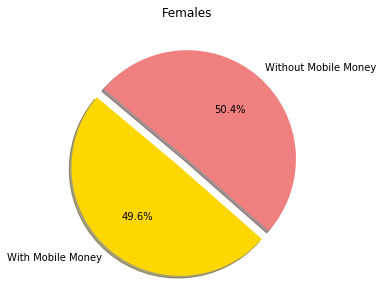

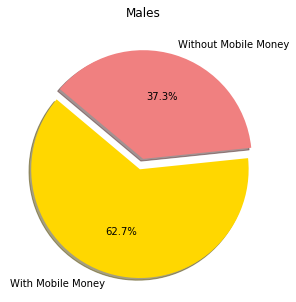

In [32]:
# For females
# Calculate piechart sizes
fmm = f1 / f * 100
fwmm = f2/f * 100

# Define the piechart
plt.figure(figsize=(10,5))
labels = ['With Mobile Money','Without Mobile Money']
sizes = [fmm,fwmm]
colors = ['gold', 'lightcoral']
explode = (0.1, 0)

# Plot the pie chart
plt.pie(sizes, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Females')

# For males
# Calculate piechart sizes
mmm = m1 / m * 100
mwmm = m2/m * 100

# Define the piechart
plt.figure(figsize=(10,5))
labels = ['With Mobile Money','Without Mobile Money']
sizes = [mmm,mwmm]
colors = ['gold', 'lightcoral']
explode = (0.1, 0)

# Plot the pie chart
plt.pie(sizes, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Males')
plt.show()

Text(0.5, 1.0, 'Relationship Status and Mobile Money')

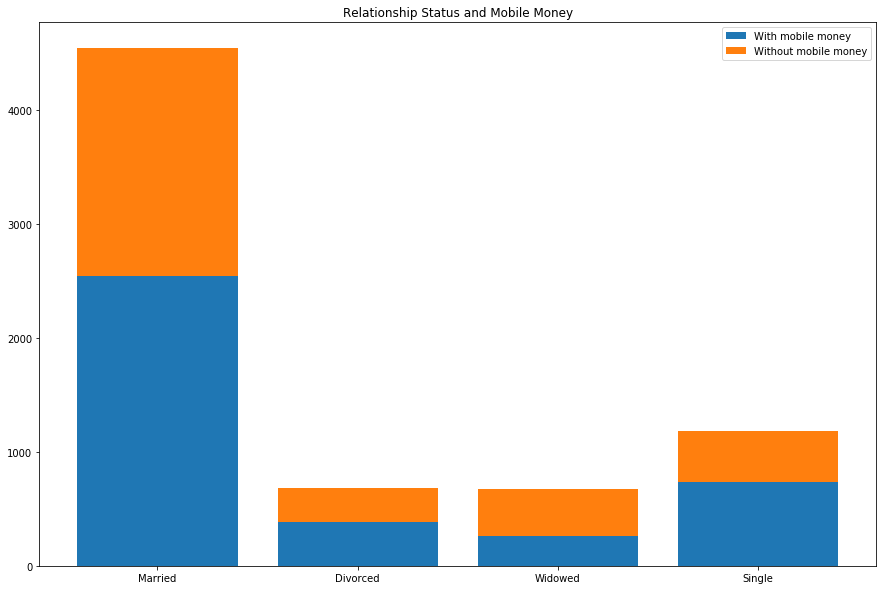

In [33]:
# Relationship status
married = mob_mon[mob_mon.Q3 == 1]
divorced = mob_mon[mob_mon.Q3 == 2]
widowed = mob_mon[mob_mon.Q3 == 3]
single = mob_mon[mob_mon.Q3 == 4]

# status on their Mobile Money
married_with = len(married[married.mobile_money == 1])
married_without = len(married[married.mobile_money == 0])

divorced_with = len(divorced[divorced.mobile_money == 1])
divorced_without = len(divorced[divorced.mobile_money == 0])

widowed_with = len(widowed[widowed.mobile_money == 1])
widowed_without = len(widowed[widowed.mobile_money == 0])

single_with = len(single[single.mobile_money == 1])
single_without = len(single[single.mobile_money == 0])

# sumation
relationship_with = [married_with, divorced_with, widowed_with, single_with]
relationship_without= [married_without, divorced_without, widowed_without, single_without]

#plotting the graph for relationship status and mobile money
plt.figure(figsize=(15,10))
plt.bar(np.arange(4), relationship_with, label='With mobile money')
plt.bar(np.arange(4), relationship_without, bottom= relationship_with, label='Without mobile money')
plt.xticks(np.arange(4), ['Married', 'Divorced', 'Widowed', 'Single'])
plt.legend(loc='upper right')
plt.title('Relationship Status and Mobile Money')

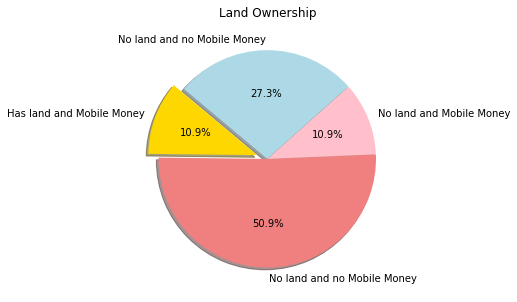

In [46]:
# Land ownership
has_land = mob_mon[mob_mon.Q6 == 1]
no_land = mob_mon[mob_mon.Q6 == 2]

# Land ownership and Mobile Money
has_land_mm = len(has_land[has_land.mobile_money == 1])
no_land_mm = len(no_land[no_land.mobile_money == 1]) 

has_land_wmm = len(has_land[has_land.mobile_money == 0])
no_land_wmm = len(no_land[no_land.mobile_money == 0])
total = has_land_mm + no_land_mm + has_land_wmm + no_land_wmm

# Plotting Land ownership and Mobile Money
# Calculate piechart sizes
lmm = has_land_mm / total * 100
nlwmm = no_land_mm / total * 100
llmm = has_land_wmm / total * 100
nnlwmm = no_land_wmm / total * 100

# Define the piechart
plt.figure(figsize=(10,5))
labels = ['Has land and Mobile Money','No land and no Mobile Money','No land and Mobile Money','No land and no Mobile Money' ]
sizes = [lmm, mwmm, llmm,nnlwmm]
colors = ['gold', 'lightcoral', 'pink', 'lightblue']
explode = (0.1, 0, 0, 0)

# Plot the pie chart
plt.pie(sizes, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Land Ownership')
plt.show()

In [50]:
# Type of income
salaries = mob_mon[mob_mon.Q8_1 == 1]
no_salaries = mob_mon[mob_mon.Q8_1 == 0]

trading = mob_mon[mob_mon.Q8_2 == 1]
no_trading = mob_mon[mob_mon.Q8_2 == 0]

services = mob_mon[mob_mon.Q8_3 == 1]
no_services = mob_mon[mob_mon.Q8_3 == 0]

piece_work = mob_mon[mob_mon.Q8_4 == 1]
no_piece_work = mob_mon[mob_mon.Q8_4 == 0]

rental_income = mob_mon[mob_mon.Q8_5 == 1]
no_rental_income = mob_mon[mob_mon.Q8_5 == 0]

interest = mob_mon[mob_mon.Q8_6 == 1]
no_interest = mob_mon[mob_mon.Q8_6 == 0]

pension = mob_mon[mob_mon.Q8_7 == 1]
no_pension = mob_mon[mob_mon.Q8_7 == 0]

social_welfare = mob_mon[mob_mon.Q8_8 == 1]
no_social_welfare = mob_mon[mob_mon.Q8_8 == 0]

rely_on_someone = mob_mon[mob_mon.Q8_9 == 1]
dont_rely_on_someone = mob_mon[mob_mon.Q8_9 == 0]

dont_get_money = mob_mon[mob_mon.Q8_10 == 1]
get_money = mob_mon[mob_mon.Q8_10 == 0]

other = mob_mon[mob_mon.Q8_11 == 1]
no_other = mob_mon[mob_mon.Q8_11 == 0]

#summation
salaries = len(salaries[salaries.mobile_money == 1])
no_salaries = len(no_salaries[no_salaries.mobile_money == 0])

trading = len(trading[trading.mobile_money == 1])
no_trading = len(no_trading[no_trading.mobile_money == 0])

services = len(services[services.mobile_money == 1])
no_services = len(no_services[no_services.mobile_money == 0])

piece_work = len(piece_work[piece_work.mobile_money == 1])
no_piece_work = len(no_piece_work[no_piece_work.mobile_money == 0])

rental_income = len(rental_income[rental_income.mobile_money == 1])
no_rental_income = len(no_rental_income[no_rental_income.mobile_money == 0])

interest = len(interest[interest.mobile_money == 1])
no_interest = len(no_interest[no_interest.mobile_money == 0])

pension = len(pension[pension.mobile_money == 1])
no_pension = len(no_pension[no_pension.mobile_money == 0])

social_welfare = len(social_welfare[social_welfare.mobile_money == 1])
no_social_welfare = len(no_social_welfare[no_social_welfare.mobile_money == 0])

rely_on_someone = len(rely_on_someone[rely_on_someone.mobile_money == 1])
dont_rely_on_someone = dont_rely_on_someone[dont_rely_on_someone.mobile_money == 0]

dont_get_money = len(dont_get_money[dont_get_money.mobile_money == 1])
get_money = len(get_money[get_money.mobile_money == 0])

other = len(other[other.mobile_money == 1])
no_other = len(no_other[no_other.mobile_money == 0])

MM = [salaries, trading, services, piece_work, rental_income, interest, pension, 
      social_welfare, rely_on_someone, dont_get_money, other]
No_MM = [no_salaries, no_trading, no_services, no_piece_work, no_rental_income, no_interest, no_pension, 
         no_social_welfare, dont_rely_on_someone, get_money, no_other]

TypeError: unsupported operand type(s) for +: 'int' and 'list'

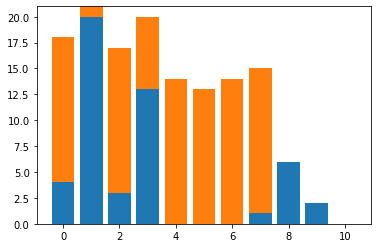

In [57]:
# Type of income
# plt.figure(figsize=(20,10))
plt.bar(np.arange(11), MM, label='With mobile money')
plt.bar(np.arange(11), No_MM, bottom= MM, label='Without mobile money')
plt.xticks(np.arange(11), ['salaries', 'trading', 'services', 'piece_work', 'rental_income', 'interest', 'pension', 
      'social_welfare', 'rely_on_someone', 'dont_get_money', 'other'])
plt.legend(loc='upper right')
plt.title('Type of Income and Mobile Money')
plt.show()

In [36]:
mob_mon_incomes = mob_mon[["Q8_1" ,"Q8_2","Q8_3","Q8_4","Q8_5","Q8_6","Q8_7","Q8_8","Q8_9","Q8_10","Q8_11"]] 

income_type = {
    "Q8_1":'Salaries/wages',
    "Q8_2":'trading/selling',
    "Q8_3":'service',
    "Q8_4":'Piece work/Casual labor/Occasional jobs',
    "Q8_5":'Rental income',
    "Q8_6":'Interest',
    "Q8_7":'Pension',
    "Q8_8":'Social welfare money/grant from Government',
    "Q8_9":'Rely on someone',
    "Q8_10":'Don’t get money',
    "Q8_11": 'Other'
}

for column,label in income_type.items():
    mob_mon_incomes[column] = [label if each ==1 else 'none' for each in mob_mon_incomes[column]]
mob_mon_incomes.head(1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q8_9,Q8_10,Q8_11
0,none,none,none,none,none,none,none,none,Rely on someone,none,none


In [37]:
x = [1,2,3,2,2,2,3,4]
def remove_none(whatever):
    return [x for x in whatever if x != "none"]

income = []
for index, row in mob_mon_incomes.iterrows():
    # this will give you a list of values in your row.
    row = list(row)

    # you want to remove all "none" values from your list.
    nfl = remove_none(row)

    # *if* your list is empty after the process of elimination, you want to append "No income".
    if len(nfl) == 0:
        nfl.append("No income")
    
    income.append(nfl)

mob_mon['income type'] = income

In [38]:
mob_mon = mob_mon.head(50)

In [ ]:
import sys
#!{sys.executable} -m pip install folium --user
import folium
from geopy.geocoders import Nominatim
from folium.plugins import MarkerCluster

In [39]:
# Creating a map for tanzania.
lat = -6.3728253; 
lon = 34.8924826
income_type_map = folium.Map(location = [lat, lon], zoom_start = 5)
marker_cluster = MarkerCluster().add_to(income_type_map)

# add markers to map
for lat, lng, label in zip(mob_mon['Latitude'], mob_mon['Longitude'], 
                           mob_mon['income type']):
    label = folium.Popup(str(label), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='purple',
        fill=True,
        fill_color='#3386cc',
        fill_opacity=0.7,
        parse_html=False).add_to(marker_cluster)  

income_type_map


In [40]:
for x in mob_mon.head()['income type']:
    print(type(str(x)))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
